In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df_raw = pd.read_csv('data/usd.csv', usecols=range(1,11))
nyc_df = df_raw[df_raw['Club']=='NYC'].reset_index(drop=True)
nyc_df

,Player,Club,MINS,POS,player,club,value,age,join_age,usd
0,Valentin Castellanos,NYC,1341,F,V. Castellanos,New York City FC,€4.00m,22.0,20.0,4720000.0
1,Jesus Medina,NYC,1495,M,J. Medina,New York City FC,€3.00m,23.0,20.0,3540000.0
2,Anton Tinnerholm,NYC,2001,D,A. Tinnerholm,New York City FC,€2.50m,30.0,26.0,2360000.0
3,Ismael Tajouri-Shradi,NYC,670,F,I. Tajouri-ShradiI,New York City FC,€1.00m,26.0,23.0,1180000.0
4,Keaton Parks,NYC,1733,M,K. Parks,New York City FC,€3.00m,23.0,22.0,3540000.0
5,Alexander Callens,NYC,1934,D,A. Callens,New York City FC,€1.80m,28.0,24.0,1180000.0
6,Maximiliano Moralez,NYC,875,M,M. Moralez,New York City FC,€1.50m,34.0,29.0,1180000.0
7,Tony Rocha,NYC,51,M,T. Rocha,New York City FC,€450Th.,27.0,25.0,472000.0
8,Gudmundur Thorarinsson,NYC,683,D,G. Thórarinsson,New York City FC,€800Th.,28.0,27.0,472000.0
9,James Sands,NYC,1409,M,J. Sands,New York City FC,€2.50m,20.0,16.0,2360000.0


In [7]:
sorted(df_raw['POS'].unique())

['D', 'D-M', 'F', 'F-M', 'M', 'M-D', 'M-F']

In [38]:
def plot_age(df, color1, color2, color3=None):
    
    if not color3:
        color3=color1
    a = 0.5 # color alpha
    a_grid = 0.4 # grid alpha
    # font size
    titlef = 24
    tickf = 18
    annof = 14

    club = df.loc[0, 'club']

    my_dpi=96
    plt.figure(figsize=(1400/my_dpi, 800/my_dpi), dpi=my_dpi)
    plt.rcParams["font.family"] = "Arial"

    ax=plt.gca()
    # ax.get_xaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.scatter(df['age'], df['MINS'], color=color1, zorder=100, s=60,
                label='Age Now (As of Mar 5, 2021)')
    for i in range(len(df)):
        x = [df.loc[i,'join_age'], df.loc[i,'age']]
        y = [df.loc[i,'MINS'], df.loc[i,'MINS']]
        plt.plot(x, y, color=color1, linewidth=4, alpha=0.7)

    plt.plot(x, y, color=color1, linewidth=4, label="Age Since Joined", alpha=a)

    for i, txt in enumerate(df['player']):
        plt.annotate(txt, (df.loc[i,'age']-.8, df.loc[i,'MINS']+25), fontsize=annof)

    ax.axvspan(25, 29, alpha=a, color=color2, label='Peak Age')


    # img=plt.imread('img/nyfc_logo.jpg')
    # frame_height=125
    # x_start=36
    # y_start=1000
    # plt.imshow(img, aspect='auto', extent=[x_start,x_start+frame_height,y_start,y_start+frame_height])


    plt.grid(alpha=a_grid)
    plt.title(f"{club} Squad Age Profile\nMajor League Soccer 2020", fontsize=titlef, fontweight='bold', loc='left')
    plt.figtext(0.125, 0.932, f"{club}", fontsize=titlef, fontweight='bold', color=color3)

    plt.ylabel("Minutes Played", fontsize=tickf)
    plt.xlabel("Age", fontsize=tickf)
    plt.xticks(range(int(df['join_age'].min())-1, int(df['age'].max())+1,2), fontsize=annof)
    plt.yticks(fontsize=annof)
    ax.set_ylim(ymin=-40)
    ax.set_xlim(xmin=int(df['join_age'].min())-.5)
    plt.legend(bbox_to_anchor=(1.0, 0.15), loc='upper left', fontsize=annof)
    plt.figtext(0.88, 0.06, "Data: transfermarkt.com & mlssoccer.com", fontsize=annof)
    plt.savefig(f'img/{"".join(club.split())}_age.png', bbox_inches='tight')
    plt.show()

In [9]:
# NYC FC
df = nyc_df
color1 = '#041E42' # for line
color2 = '#F15524' # for peak age
color3 = '#6CACE4' # for title

In [244]:
# Columbus Crew
df = df_raw[df_raw['Club']=='CLB'].reset_index(drop=True)
color1 = '#231F20' # for line
color2 = '#FEF200' # for peak age
color3 = '#FEF200' # for title

In [246]:
# Philadelphia Union
df = df_raw[df_raw['Club']=='PHI'].reset_index(drop=True)
color1 = '#002D55' # for line
color2 = '#B38707' # for peak age
color3 = '#B38707' # for title

In [284]:
# Seattle Sounders
df = df_raw[df_raw['Club']=='SEA'].reset_index(drop=True)
color1 = '#236192' # for line
color2 = '#658D1B' # for peak age
color3 = '#658D1B' # for title

In [268]:
# Sporting Kansas City
df = df_raw[df_raw['Club']=='SKC'].reset_index(drop=True)
color1 = '#93B1D7' # for line
color2 = '#A0A1A5' # for peak age
color3 = '#93B1D7' # for title

In [207]:
# Toronto FC
df = df_raw[df_raw['Club']=='TOR'].reset_index(drop=True)
color1 = '#AB1E2D' # for line
color2 = '#A3AAAD' # for peak age
color3 = '#AB1E2D' # for title

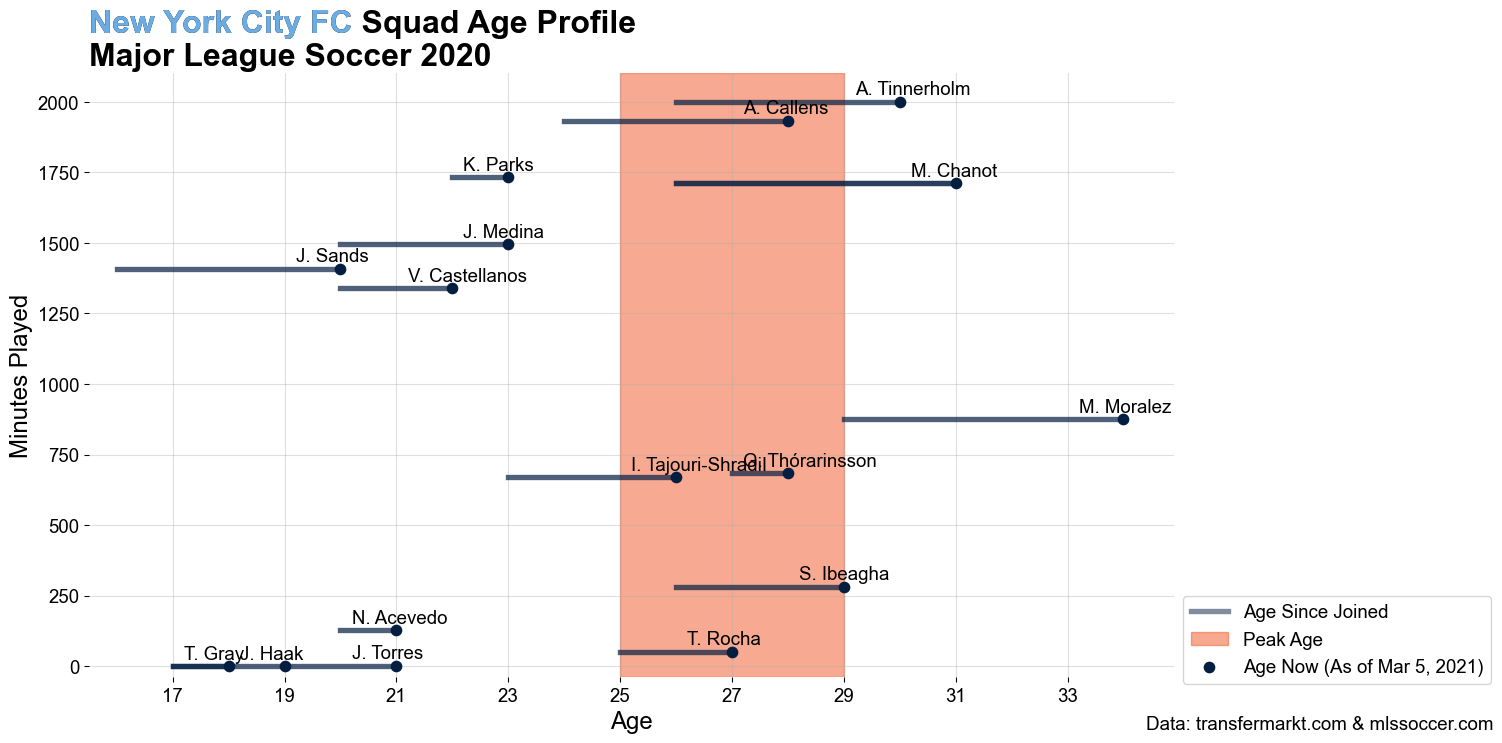

In [39]:
plot_age(df, color1, color2, color3)

(array([12., 37., 52., 78., 66., 66., 67., 51., 26., 13.,  7.]),
 array([16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38.]),
 <BarContainer object of 11 artists>)

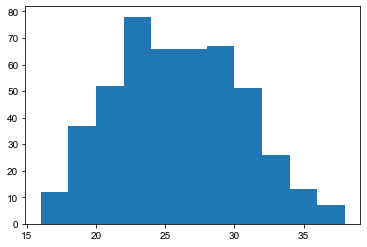

In [179]:
plt.hist(df_raw['age'], bins=11)

In [ ]:
from scipy.stats import norm

data = np.random.normal(loc=5.0, scale=2.0, size=1000)
mean,std=norm.fit(data)

In [52]:
mil_df = df[df['usd']>=10000000].reset_index(drop=True)
mil_df

,Player,Club,MINS,POS,player,club,value,age,join_age,usd
0,Diego Rossi,LAFC,1698,F,D. Rossi,Los Angeles FC,€20.00m,23.0,19.0,23600000.0
1,Alejandro Pozuelo,TOR,2015,M,A. Pozuelo,Toronto FC,€12.00m,29.0,27.0,14160000.0
2,Alan Pulido,SKC,962,F,A. Pulido,Sporting Kansas City,€9.00m,29.0,28.0,10620000.0
3,Lucas Zelarayan,CLB,1039,M,L. Zelarayán,Columbus Crew SC,€10.00m,28.0,27.0,11800000.0
4,Rodolfo Pizarro,MIA,1578,M,R. Pizarro,Inter Miami CF,€10.00m,27.0,26.0,11800000.0
5,Carlos Vela,LAFC,422,F,C. Vela,Los Angeles FC,€15.00m,32.0,28.0,17700000.0
6,Ezequiel Barco,ATL,1034,M,E. Barco,Atlanta United FC,€10.00m,21.0,18.0,11800000.0
7,Emanuel Reynoso,MIN,826,M,E. Reynoso,Minnesota United FC,€10.00m,25.0,24.0,11800000.0
8,Gonzalo Higuain,MIA,802,F,G. Higuaín,Inter Miami CF,€10.00m,33.0,32.0,11800000.0
9,Josef Martinez,ATL,69,F,J. Martínez,Atlanta United FC,€14.00m,27.0,23.0,16520000.0


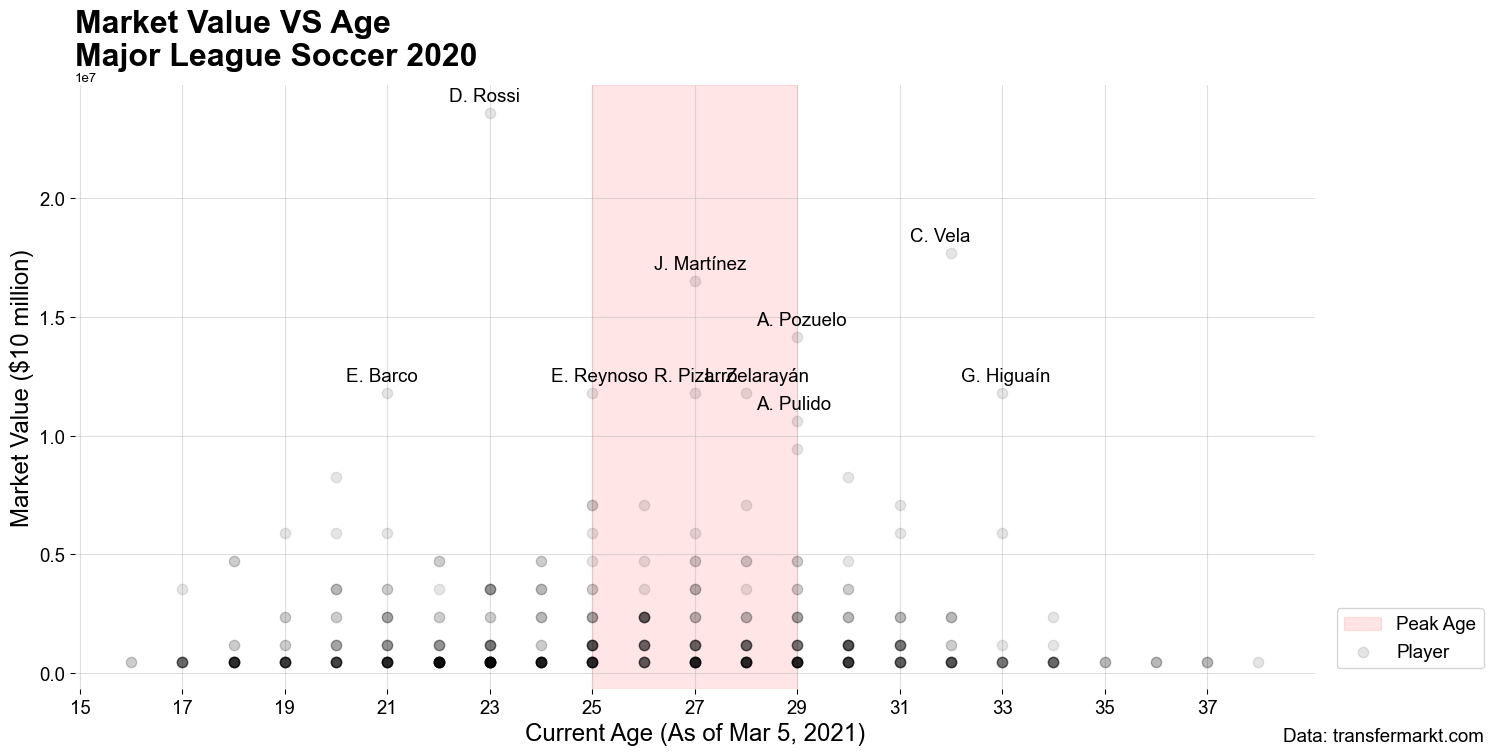

In [76]:
df = df_raw
a = 0.1 # color alpha
a_grid = 0.4 # grid alpha
# font size
titlef = 24
tickf = 18
annof = 14

my_dpi=96
plt.figure(figsize=(1600/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.rcParams["font.family"] = "Arial"

ax=plt.gca()
# ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.scatter(df['age'], df['usd'], color='k', zorder=100, s=60, label='Player', alpha=.1)

for i, txt in enumerate(mil_df['player']):
    plt.annotate(txt, (mil_df.loc[i,'age']-.8, mil_df.loc[i,'usd']+500000), fontsize=annof)

ax.axvspan(25, 29, alpha=a, color='r', label='Peak Age')

plt.grid(alpha=a_grid)
plt.title("Market Value VS Age\nMajor League Soccer 2020", fontsize=titlef, y=1.02,
          fontweight='bold', loc='left')
plt.ylabel("Market Value ($10 million)", fontsize=tickf)
plt.xlabel("Current Age (As of Mar 5, 2021)", fontsize=tickf)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(fontsize=14)
# ax.set_yscale('log')
# ax.set_ylim(ymin=-40)
# ax.set_xlim(xmin=15.5)
plt.legend(bbox_to_anchor=(1.01, 0.15), loc='upper left', fontsize=14)
plt.figtext(0.88, 0.06, "Data: transfermarkt.com", fontsize=annof)
plt.savefig('img/marketvalue_age.png', bbox_inches='tight')
plt.show()

In [277]:
int(df['join_age'].min())

15

where is the peak age?
1. market value
2. rank
3. xG or other

In [67]:
ag_df = pd.read_csv('data/age_g+.csv', usecols=range(1,19))
ag_df

,player,club,value,age,join_age,name,Player,Team,Season,Position,Minutes,Dribbling,Fouling,Interrupting,Passing,Receiving,Shooting,Goals Added
0,E. Segura,Los Angeles FC,€2.50m,24.0,22.0,Eddie Segura,Eddie Segura,LAFC,2020.0,CB,2068.0,0.51,-0.11,-0.26,0.61,-0.02,-0.28,0.46
1,M. Traore,Los Angeles FC,€100Th.,18.0,18.0,Mohamed Traore,Mohamed Traore,LAFC,2020.0,CB,49.0,-0.02,0.01,-0.03,-0.02,-0.01,-0.03,-0.11
2,D. Palacios,Los Angeles FC,€1.50m,21.0,20.0,Diego Palacios,Diego Palacios,LAFC,2020.0,FB,1321.0,-0.02,0.15,0.22,-0.26,0.18,0.01,0.27
3,M. Farfán,Los Angeles FC,€1.00m,22.0,22.0,Marco Farfan,Marco Farfan,POR,2020.0,FB,949.0,-0.25,-0.03,0.61,-0.37,-0.11,-0.04,-0.20
4,J. Harvey,Los Angeles FC,€250Th.,37.0,33.0,Jordan Harvey,Jordan Harvey,LAFC,2020.0,FB,831.0,-0.09,-0.17,-0.43,0.24,-0.06,-0.00,-0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,A. Rusnák,Real Salt Lake City,€2.00m,26.0,22.0,Albert Rusnak,Albert Rusnák,RSL,2020.0,AM,1388.0,0.25,-0.06,0.02,0.47,-0.52,0.47,0.63
440,J. Meram,Real Salt Lake City,€1.20m,32.0,31.0,Justin Meram,Justin Meram,RSL,2020.0,W,1242.0,0.17,0.14,-0.30,-0.15,0.24,-0.14,-0.03
441,T. Schmitt,Real Salt Lake City,€200Th.,23.0,21.0,Tate Schmitt,Tate Schmitt,RSL,2020.0,DM,274.0,-0.28,0.01,-0.07,-0.16,0.04,-0.04,-0.50
442,C. Garcia,Real Salt Lake City,€100Th.,18.0,17.0,Christopher Garcia,Christopher Garcia,RSL,2020.0,W,3.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01


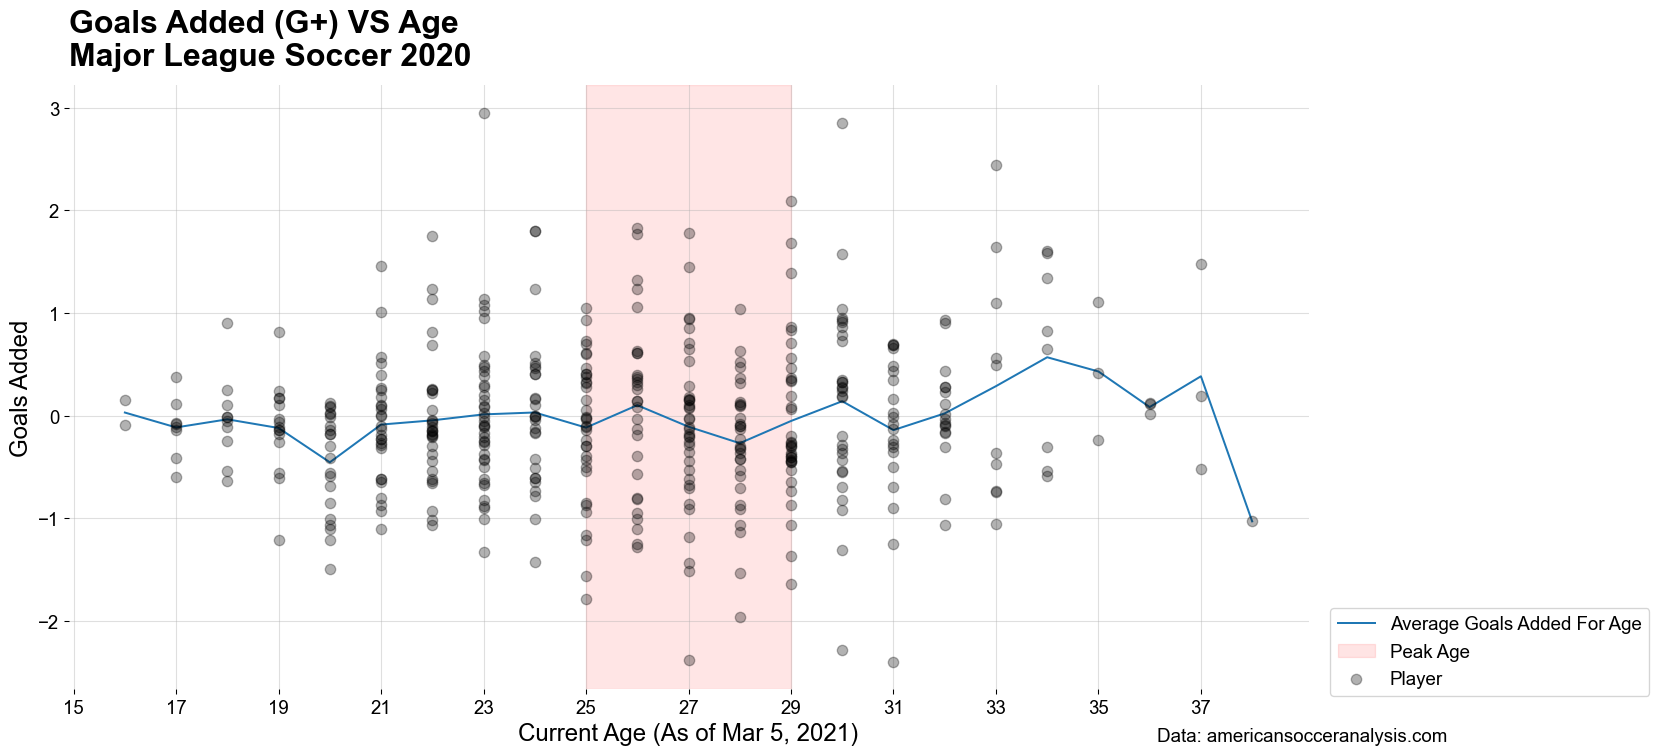

In [111]:
df = ag_df
a = 0.1 # color alpha
a_grid = 0.4 # grid alpha
# font size
titlef = 24
tickf = 18
annof = 14

my_dpi=96
plt.figure(figsize=(1600/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.rcParams["font.family"] = "Arial"

ax=plt.gca()
# ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.scatter(df['age'], df['Goals Added'], color='k', zorder=100, s=60, label='Player', alpha=.3)

# for i, txt in enumerate(mil_df['player']):
#     plt.annotate(txt, (mil_df.loc[i,'age']-.8, mil_df.loc[i,'usd']+500000), fontsize=annof)

ax.axvspan(25, 29, alpha=a, color='r', label='Peak Age')

# calculate mean and CI
x = sorted(df['age'].unique())
y = np.array([])
c = np.array([])
for a in x:
    ya = df[df['age']==a]['Goals Added']
    my = np.mean(ya)
    ci = 1.96*np.std(ya)/my
    y = np.append(y, my)
    c = np.append(c, ci)

plt.plot(x,y, label="Average Goals Added For Age")
# plt.fill_between(x, (y-c)/100, (y+c)/100, color='b', alpha=.1)

plt.grid(alpha=a_grid)
plt.title("Goals Added (G+) VS Age\nMajor League Soccer 2020", fontsize=titlef, y=1.02,
          fontweight='bold', loc='left')
plt.ylabel("Goals Added", fontsize=tickf)
plt.xlabel("Current Age (As of Mar 5, 2021)", fontsize=tickf)
plt.xticks(range(15, 39,2), fontsize=annof)
plt.yticks(fontsize=14)
# ax.set_yscale('log')
# ax.set_ylim(ymin=-40)
# ax.set_xlim(xmin=15.5)
plt.legend(bbox_to_anchor=(1.01, 0.15), loc='upper left', fontsize=14)
plt.figtext(0.805, 0.06, "Data: americansocceranalysis.com", fontsize=annof)
plt.savefig('img/marketvalue_age.png', bbox_inches='tight')
plt.show()

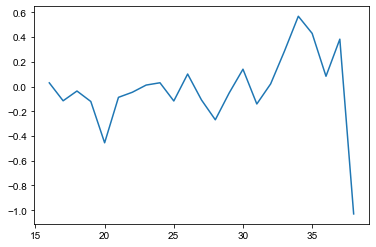

In [102]:
df = ag_df

x = sorted(df['age'].unique())
y = np.array([])
c = np.array([])
for a in x:
    ya = df[df['age']==a]['Goals Added']
    my = np.mean(ya)
    ci = 1.96*np.std(ya)/my
    y = np.append(y, my)
    c = np.append(c, ci)

plt.plot(x,y)
# plt.fill_between(x, (y-c), (y+c), color='b', alpha=.1)
plt.show()

In [86]:
1.96*np.std(ya)/np.mean(ya)

47.14987213557735

In [108]:
y

array([ 0.03      , -0.115     , -0.036     , -0.12066667, -0.4547619 ,
       -0.08714286, -0.04612903,  0.01205128,  0.03071429, -0.11657143,
        0.10137931, -0.10810811, -0.26870968, -0.05228571,  0.14034483,
       -0.14095238,  0.02176471,  0.287     ,  0.56875   ,  0.43      ,
        0.08333333,  0.38333333, -1.03      ])

In [109]:
c

array([  7.84      ,  -4.75158603, -22.10229875,  -7.10338229,
        -2.09446728, -12.72681454, -26.88890485, 121.82665465,
        47.14987214, -11.44723808,  16.29860253, -14.59788868,
        -4.57970247, -29.33846503,  13.29264275, -10.18918904,
        43.95180049,   7.523923  ,   3.00796317,   2.51235786,
         1.05767382,   4.2328946 ,  -0.        ])

In [110]:
y+c

array([  7.87      ,  -4.86658603, -22.13829875,  -7.22404896,
        -2.54922918, -12.8139574 , -26.93503388, 121.83870594,
        47.18058642, -11.56380951,  16.39998184, -14.70599679,
        -4.84841215, -29.39075074,  13.43298758, -10.33014142,
        43.9735652 ,   7.810923  ,   3.57671317,   2.94235786,
         1.14100716,   4.61622793,  -1.03      ])